In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt

import tensorflow as tf

/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
def kl_devergence(b,p,p_hat,eps):
    #定义惩罚因子
    #p是期望激活度，p_hat是实际激活度，eps是缓冲
    #定义范围
    p_0=tf.clip_by_value(p,eps,1)#p的范围是eps-1  tf.clip_by_value将张量p的值剪切为指定的最小值和最大值
    p_1=tf.clip_by_value(1-p,eps,1) 
    p_hat_0=tf.clip_by_value(p_hat,eps,1)
    p_hat_1=tf.clip_by_value(1-p_hat,eps,1)
    
    res=p_0*(tf.log(p_0)-tf.log(p_hat_0))+p_1*(tf.log(p_1)-tf.log(p_hat_1))
    res=b*tf.reduce_mean(res)
    
    return res

In [1]:
with tf.Graph().as_default() as g:
    #构建输入输出
    in_out=tf.placeholder(shape=[None,784],dtype=tf.float32)
    #隐藏层
    h=tf.keras.layers.Dense(100,activation=tf.nn.sigmoid)(in_out)
    #输出层
    out=tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    #代价函数
     loss=tf.reduce_mean(tf.keras.losses.mean_squared_error(in_out,out))+kl_devergence(0.003,0.05,h,1e-7)      
    

NameError: name 'tf' is not defined

0.2354989


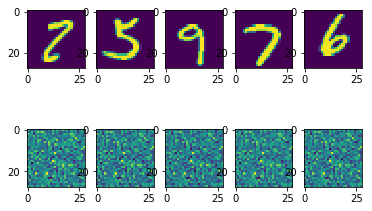

0.16286881


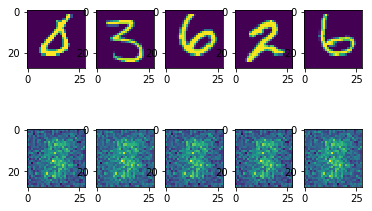

0.11831928


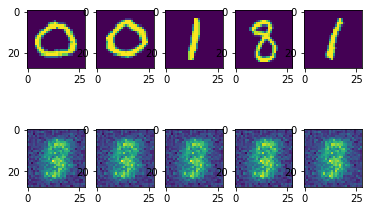

0.095844164


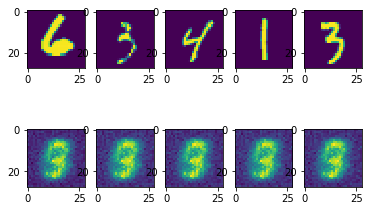

0.08424044


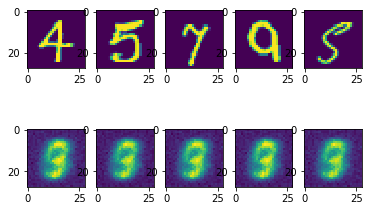

0.07873788


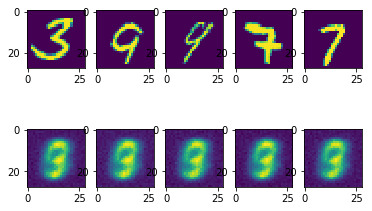

0.081847884


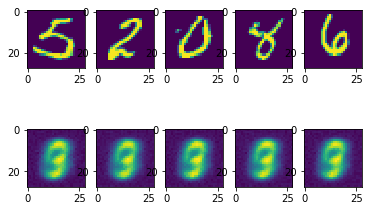

0.074546985


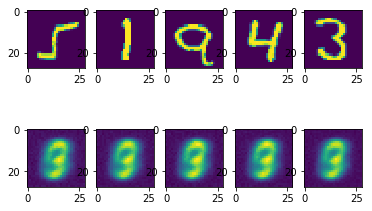

0.076514706


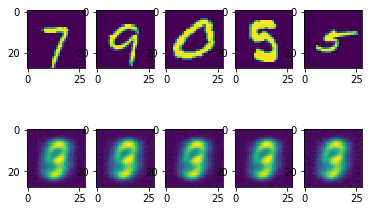

0.07311118


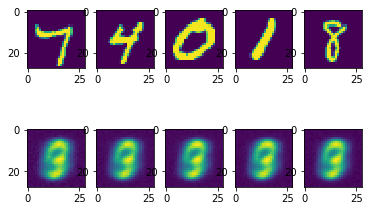

In [35]:
with tf.Session(graph=g) as sess:
    #定义优化器
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.06)#梯度下降
    train_op = optim.minimize(loss)#最小化代价
    sess.run(tf.global_variables_initializer())
   
    for i in range(10000):
        batch_img,_=mnist.train.next_batch(32)
        res_loss,_=sess.run([loss,train_op],feed_dict={in_out:batch_img})
        if i%1000==0:
            print(res_loss)
            batch_img,_=mnist.test.next_batch(5)
            res_out=sess.run(out,feed_dict={in_out:batch_img})
            
            for j in range(10):
                plt.subplot(2,5,j+1)
                if j<5:
                    img=batch_img[j]
                else: 
                    img=res_out[j-5]
                img=(img*255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()
                #plt.imshow ((img*255).astype(np.uint8).reshape([28,28]))
                

In [37]:
#learning_rate=0.03  b=0.02,result_min=0.102
#                    b=0.01,result_min=0.09
#                    b=0.005,result_min=0.088
#                    b=0.004,result_min=0.084
#                    b=0.003,result_min=0.0841
#learning_rate=0.04  b=0.003,result_min=0.0779
#                    b=0.0027,result_min=0.0839
#learning_rate=0.05  b=0.003,result_min=0.0753
#                    b=0.0031,result_min=0.0771
#                    b=0.0029,result_min=0.0763,result_end=0.0799
#learning_rate=0.06  b=0.003,result_min=0.0731